In [8]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from utils import *
from sklearn.model_selection import train_test_split



In [3]:
dataset = 'DiatomSizeReduction'


In [77]:
data, labels = get_data(dataset, '\t')
labels = class_offset(labels, dataset)
print(data.shape)
labels.shape
labels

(320, 345)


array([2., 3., 2., 2., 1., 3., 2., 3., 0., 1., 2., 1., 3., 1., 1., 1., 3.,
       1., 3., 1., 2., 2., 3., 1., 0., 2., 2., 3., 2., 3., 1., 1., 3., 2.,
       1., 1., 3., 3., 2., 2., 0., 2., 3., 1., 3., 0., 2., 3., 3., 3., 1.,
       2., 3., 1., 3., 3., 3., 3., 2., 1., 3., 0., 3., 3., 2., 3., 0., 1.,
       1., 3., 2., 1., 1., 2., 0., 2., 1., 1., 2., 1., 2., 2., 1., 0., 2.,
       3., 1., 2., 1., 3., 3., 1., 2., 1., 1., 0., 0., 3., 2., 3., 1., 3.,
       1., 1., 2., 3., 2., 2., 0., 2., 2., 2., 3., 2., 2., 2., 1., 1., 3.,
       1., 0., 2., 3., 2., 2., 3., 1., 1., 1., 3., 3., 3., 2., 3., 0., 2.,
       3., 2., 2., 2., 2., 1., 1., 2., 2., 2., 3., 2., 1., 0., 1., 0., 1.,
       1., 1., 1., 3., 3., 3., 2., 1., 1., 3., 2., 0., 1., 1., 2., 2., 2.,
       1., 1., 3., 2., 3., 1., 1., 3., 0., 1., 1., 3., 0., 2., 3., 0., 2.,
       3., 3., 2., 1., 3., 1., 3., 2., 3., 3., 0., 3., 3., 0., 1., 1., 3.,
       3., 2., 2., 2., 1., 2., 2., 3., 2., 1., 0., 3., 3., 2., 1., 2., 3.,
       0., 2., 2., 1., 1.

In [78]:
_, rat = np.unique(labels, return_counts=True)





In [81]:
def donut_visu(ax, data,name):
  recipe = [f'{round(data[i]/data.sum(),1)*100} % - Class {i}' for i in range(len(rat))]


  wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

  bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
  kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

  for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

  ax.set_title(name)


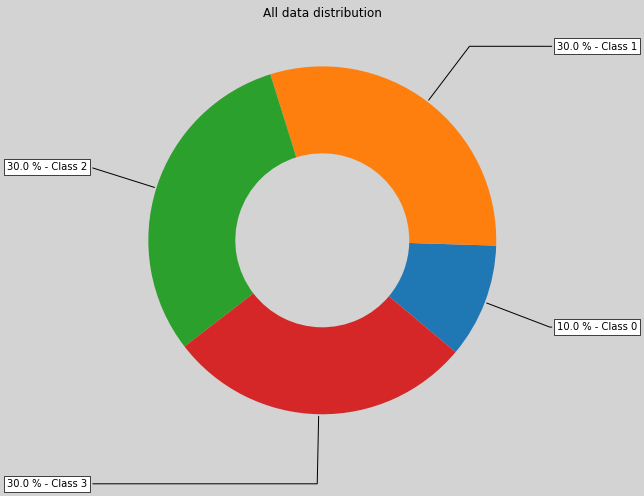

In [82]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_facecolor('lightgrey')

donut_visu(ax,rat,'All data distribution')


plt.show()

In [83]:

x_train, x_rem, y_train, y_rem = train_test_split(data,labels, train_size=0.8)
x_val, x_test, y_val, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

print('train shape', x_train.shape)
print('validation shape', x_val.shape)
print('test shape', x_test.shape)

train shape (256, 345)
validation shape (32, 345)
test shape (32, 345)


In [84]:
_, rat_train = np.unique(y_train, return_counts=True)

_, rat_val = np.unique(y_val, return_counts=True)

_, rat_test = np.unique(y_test, return_counts=True)


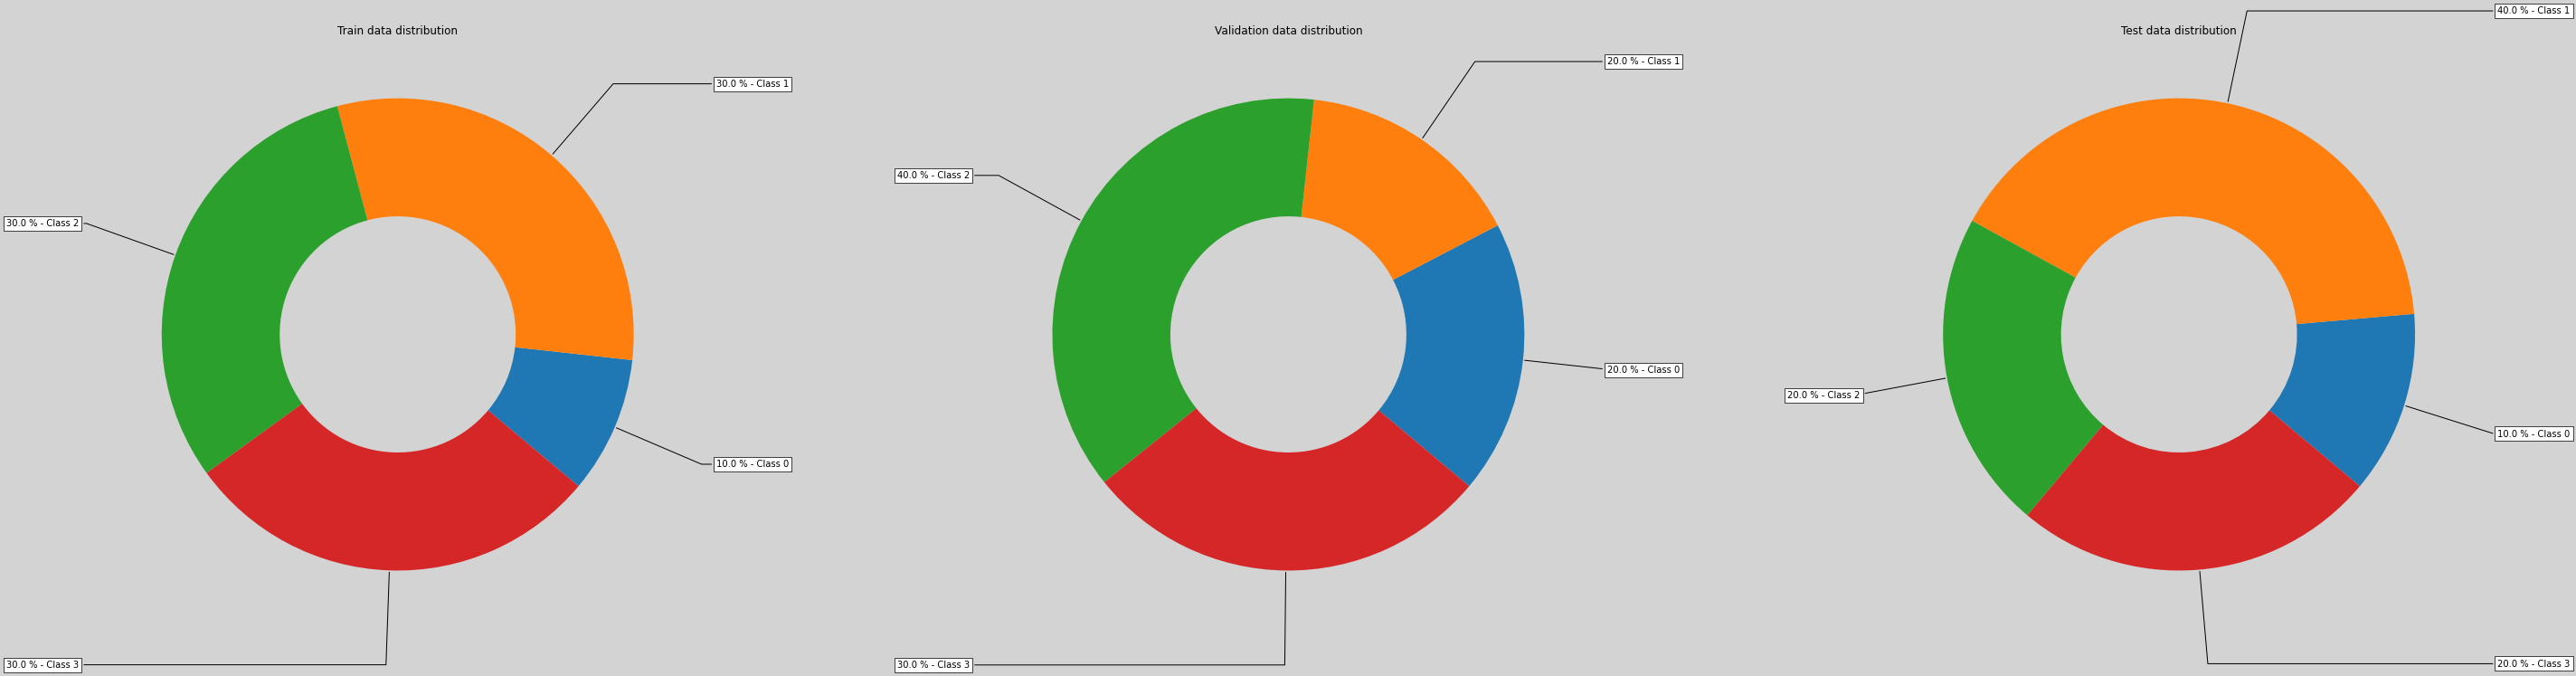

In [85]:
fig, (ax0,ax1,ax2) = plt.subplots(1,3,figsize=(50, 12))

fig.set_facecolor('lightgrey')

donut_visu(ax0,rat_train,'Train data distribution')
donut_visu(ax1,rat_val,'Validation data distribution')
donut_visu(ax2,rat_test,'Test data distribution')

plt.show()

In [ ]:
nb_class = nb_classes(dataset)
nb_dims = nb_dims(dataset)


nb_timesteps = int(x_train.shape[1] / nb_dims)
input_shape = (nb_timesteps , nb_dims)

x_train_max = np.max(x_train)
x_train_min = np.min(x_train)
    #normalise in [-1;1]
x_train = 2. * (x_train - x_train_min) / (x_train_max - x_train_min) - 1.
x_val = 2. * (x_val - x_train_min) / (x_train_max - x_train_min) - 1.
x_test = 2. * (x_test - x_train_min) / (x_train_max - x_train_min) - 1.


#x_test = x_test.reshape((-1, input_shape[0], input_shape[1]))
#x_train = x_train.reshape((-1, input_shape[0], input_shape[1]))
##